In [223]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette(palette = sns.cubehelix_palette(16, start=.5, rot=-.75))
%matplotlib inline

current_palette = (sns.cubehelix_palette(11, start = 0, rot = -.2, hue = .8))
color_palette_yo = sns.color_palette([[0.511349894059193, 0.6806709659595941, 0.7655890224567563],
                   [0.2764281884911032, 0.3731732867646266, 0.5243966585385236]])
color_palette_reds = (sns.cubehelix_palette(15, start = 0, rot = .4, gamma = .7, hue = .8))
color_palette_hey = sns.color_palette([[0.8779531840825798, 0.6723830245166298, 0.7305569619550163],
                    [0.38797959952069316, 0.2634205644548702, 0.4756315557339966]])

This data set is from the Pew Research Center and shows the results of a _[survey](http://www.pewinternet.org/dataset/march-2016-libraries/)_ regarding Internet use, Library use and reading habits of the respondents. 

_[In an article summarizing the data](http://www.pewinternet.org/2016/09/01/book-reading-2016-appendix-a/)_, the Research Center notes that, despite the existence of numerous reading tablets and devices, print readership still remained dominant. With a background in literature and experience consulting medieval manuscripts in Italy, I was interested in this preference for print amongst the slew of recently developed reading platforms. As such, I wanted to use this capstone project to look into the demographics of these readers, as well as how their level of internet use correlates to their preference for print materials over digital materials.  I will start with examining the demographics of these readers, thereafter moving on to investigate how use of technology may or may not influence their decision making.

In [138]:
data = pd.read_csv("April_4_2016_Libraries.csv")

all_data = pd.DataFrame(data)

In [222]:
g = all_data.intfreq.replace(' ', 0).astype(float).astype(int)
h = all_data.books2a.replace(' ', 0).astype(float).astype(int)
i = all_data.books2b.replace(' ', 0).astype(float).astype(int)
j = all_data.books2c.replace(' ', 0).astype(float).astype(int)
k = all_data.act128.replace(' ', 0).astype(float).astype(int)
l = all_data.act129.replace(' ', 0).astype(float).astype(int)
m = all_data.sns2a.replace(' ', 0).astype(float).astype(int)
n = all_data.sns2e.replace(' ', 0).astype(float).astype(int)
o = all_data.q8a.replace(' ', 0).astype(float).astype(int)
p = all_data.q8b.replace(' ', 0).astype(float).astype(int)
q = all_data.q8c.replace(' ', 0).astype(float).astype(int)
r = all_data.q8d.replace(' ', 0).astype(float).astype(int)
x = all_data.books1.replace(' ', 0).astype(float).astype(int)

frames = [g, h, i, j, k, l, m, n, o, p, q, r]

s = all_data.sex
t = all_data.q2a
u = all_data.q2c
v = all_data.q3
w = all_data.inc

frames_2 = [s, t, u, v, w]

better_beta = pd.DataFrame(frames)
beta = pd.DataFrame(frames_2)

better_data = beta.append(better_beta)
better_data_x = better_data.transpose()

In [141]:
# Those reading more than 20 books/year:
readers = all_data[all_data['books1'] > 20]

# Those who read printed books(not necessarily exclusively):
prints = better_data_x[better_data_x['books2a'] == 1]
audiobooks = better_data_x[better_data_x['books2b'] == 1]
ebooks = better_data_x[better_data_x['books2c'] == 1]

# # Counts of people who read various medias
medias = [prints, audiobooks, ebooks]
media_type = pd.concat(medias)
media_beta = media_type[['books2a', 'books2b', 'books2c']]

# Sometimes feel stressed:
infostress1 = all_data[all_data['q2a'] == 1]

# Stress re institutional information:
infostress2 = all_data[all_data['q2c'] == 1]

# Definitely overloaded:
overload = better_data_x[better_data_x['q3'] == 1]

# Like the info:
like_info = better_data_x[better_data_x['q3'] == 2]
infostress_gen = better_data_x.where((better_data_x.q3 == 2) | (better_data_x.q3 == 1))

# App with message deleting:
snapchat = better_data_x[better_data_x['act128'] == 1]

# Anonymous App
anonapp = better_data_x[better_data_x['act129'] == 1]

# Frequent Twitter Users:
twitter = better_data_x.where((better_data_x.sns2a == 1) | (better_data_x.sns2a == 2))

# Frequent Facebook Users:
facebook = better_data_x.where((better_data_x.sns2e == 1) | (better_data_x.sns2e == 2))

# Reading Interests:
reader_interests = better_data_x[['q8a', 'q8b', 'q8c', 'q8d']]

# Information good or bad?:
infostatus = all_data.where((all_data.q4 == 1) | (all_data.q4 == 2))

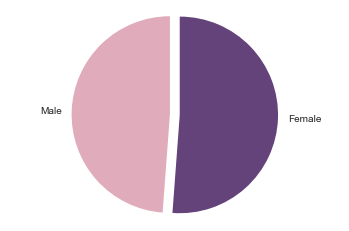

In [142]:
gender_breakdown = prints.groupby('sex').agg('count').reset_index()
explode = (0, 0.1)

plt.pie(gender_breakdown.books2a, explode = explode, labels = ['Male', 'Female'], 
        colors = ['#e0abba', '#634379'], startangle=90)
plt.axis('equal')
plt.show()


With this graph, I wanted to get an idea of how the preference for print was characterized by gender.  Here, you can see that the findings are pretty evenly spread.  There is a very slight majority of female readers who prefer paper-books.  It is important to note here that this category does not exclude respondents who *also* decided to read on other platforms. As such, we cannot deduce that the respondents visualized above read print exclusively, but instead that they did not *avoid* or *completely opt away from* print materials.

In [143]:
a = prints[prints.inc != 99]
b = prints[prints.inc != 98]

c = audiobooks[audiobooks.inc != 99]
d = audiobooks[audiobooks.inc != 98]

e = ebooks[ebooks.inc != 99]
f = ebooks[ebooks.inc != 98]

beta_b = a.merge(b)
beta_2 = pd.DataFrame(beta_b)

theta = c.merge(d)
theta_2 = pd.DataFrame(theta)

zeta = e.merge(f)
zeta_2 = pd.DataFrame(zeta)

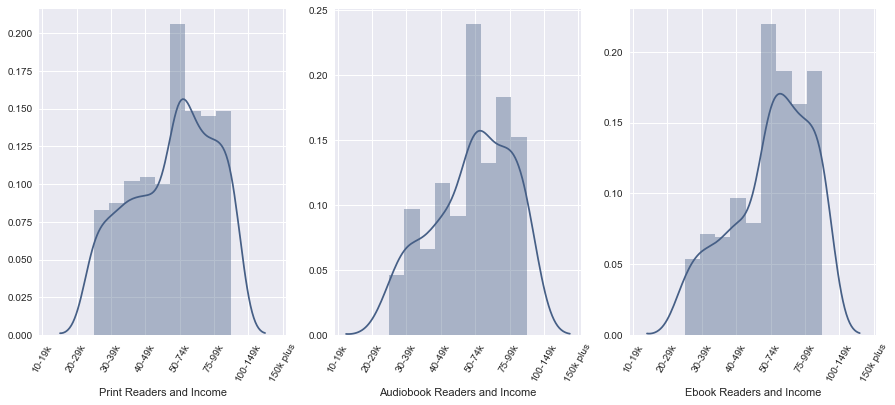

In [163]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6), sharex = True, sharey = False)

sns.distplot(beta_2.inc, ax = ax1, bins = 9, color = '#465f86',
             axlabel = "Print Readers and Income").set_xticklabels(['< 10k',
             '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k',
             '100-149k', '150k plus'], rotation = 60)

sns.distplot(theta_2.inc, ax = ax2, bins = 9, color = '#465f86',
             axlabel = "Audiobook Readers and Income").set_xticklabels(['< 10k',
            '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k', 
            '100-149k', '150k plus'], rotation = 60)


sns.distplot(zeta_2.inc, ax = ax3, bins = 9, color = '#465f86',
             axlabel = "Ebook Readers and Income").set_xticklabels(['< 10k',
            '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', '75-99k',
            '100-149k', '150k plus'], rotation = 60)
plt.show()

Here, I thought it would be interesting to compare the income levels of those who read books in different formats.  Based on these graphs, there really isn't too much of a distinction, aside from the fact that electronic platforms (Audiobooks and Ebooks) have a greater dispartity in income when compared to those who read print books (something that was also noted in the article mentioned above).  Again, there could be some overlap here, so this is not conclusive, but there is a slight difference in this set of data.

In [145]:
delta_1 = prints[(prints.intfreq == 3) | (prints.intfreq == 2) | (prints.intfreq == 1)]
delta_2 = delta_1[(delta_1.q3 <= 2)].reset_index()
delta_3 = better_data_x[(better_data_x.intfreq == 3) | (better_data_x.intfreq == 2) | (better_data_x.intfreq == 1)]
delta_4 = delta_3[(delta_3.q3 <= 2)].reset_index()

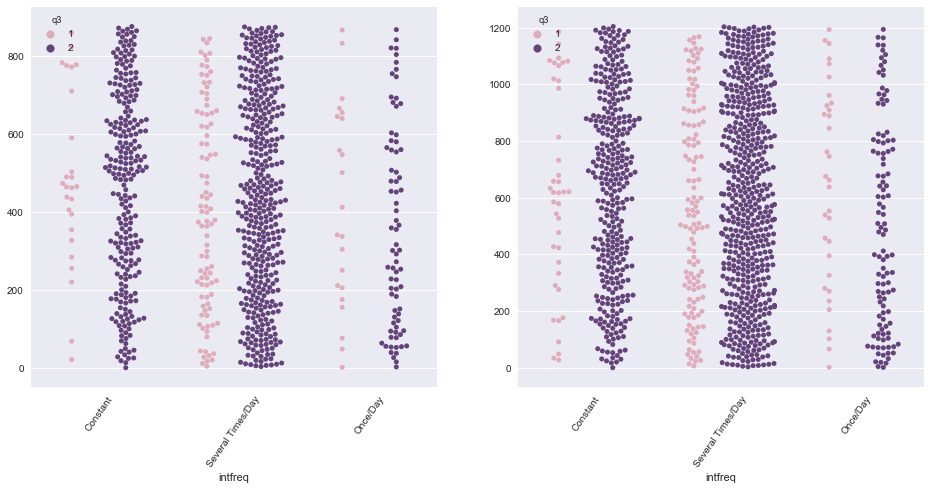

In [173]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7), sharex = True, sharey = False)

sns.swarmplot(x = 'intfreq', y = delta_2.index, hue = 'q3', data = delta_2,
            split = True, palette = color_palette_hey, ax = ax1).set_xticklabels(['Constant',
              'Several Times/Day', 'Once/Day'], rotation = 55)
sns.swarmplot(x = 'intfreq', y = delta_4.index, hue = 'q3', data = delta_4,
            split = True, palette = color_palette_hey, ax = ax2).set_xticklabels(['Constant',
              'Several Times/Day', 'Once/Day'], rotation = 55)

plt.show()

Here, I wanted to see the distribution among the respondents regarding a few variables at once:

 - Who was choosing to read physical books in comparison to the sum of the respondents at large,
 - How many of these two groups were using the internet frequently and how frequently were they using it.
 - How many of each group either felt overwhelmed by all of the information they encounter on a daily basis or felt that they liked this growing amount of information.
 
Given that the Pew Center's article mentioned a pervasive selection of print books amongst the growing number of e-reading options, I wanted to see if there was any correlation of people choosing print books *because* they felt overloaded/stressed by all of this information.  If that were the case, the graph on the left would have a greater presence of lightly-colored data-points. It seems, however, as if the opposite is true: While those who use the internet frequently (whether they read print books or not), seem to enjoy the amount of information available to them, the same is true of those who use print books.  In other words, those choosing print books seem to be just as likely to enjoy the amount of digital information available to them as those who do *not* read print books.  While we cannot conclusively rule out the possibility that people still read print books as a means of avoiding or taking a break from digital media, it seems as if this data set points to the possibility that digital media does not have an inversely proportional relationship with print media. 

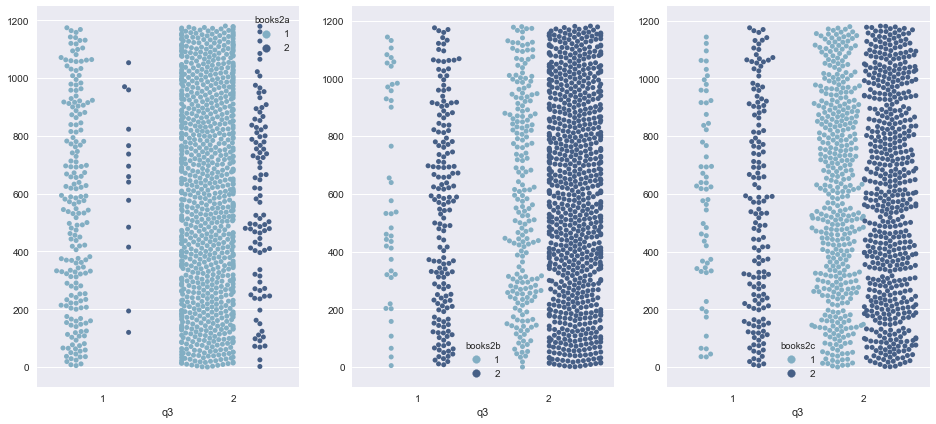

In [147]:
phi = better_data_x[(better_data_x.q3 == 1) | (better_data_x.q3 == 2)]
rho = phi[(phi.books2a == 1) | (phi.books2a == 2)].reset_index()
psi = phi[(phi.books2b == 1) | (phi.books2b == 2)].reset_index()
pi = phi[(phi.books2c == 1) | (phi.books2c == 2)].reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 7), sharex = True, sharey = False)
sns.swarmplot(x = 'q3', y = rho.index, hue = 'books2a', data = rho, 
              split = True, palette = color_palette_yo,
              ax = ax1)
sns.swarmplot(x = 'q3', y = psi.index, hue = 'books2b', data = psi, 
              split = True, palette = color_palette_yo,
              ax = ax2) 
sns.swarmplot(x = 'q3', y = pi.index, hue = 'books2c', data = pi, 
              split = True, palette = color_palette_yo,
              ax = ax3) 
plt.show()

These three graphs were generated to see how the respondents choose their reading formats in relation to their perspectives on the amount of information available to them (either too much or a likeable amount). They seem to corroborate the trend mentioned above. 

In the first graph, we observe those who were either overwhelmed or pleased with the amount of information available.  While a stark majority of those who were overwhelmed did choose print books as opposed to not choosing them, those who enjoyed more prevalent information *vastly* still read print media.

Moving on the the middle graph, those in group 2 (i.e. those who like information) demonstrated an avoidance of audiobooks, which was relatively similar to the trend for group 1.

In the last group, the results are split as to those who read e-books in group 2 and those who do not. Interestingly enough, the context where we see the greatest difference is in the first graph, where print books are drastically choosen by both those in group 1 and group 2 while negative responses to print books are noteably low. In other words, print media is the favorite of those who enjoy digital information as well as those who do not.

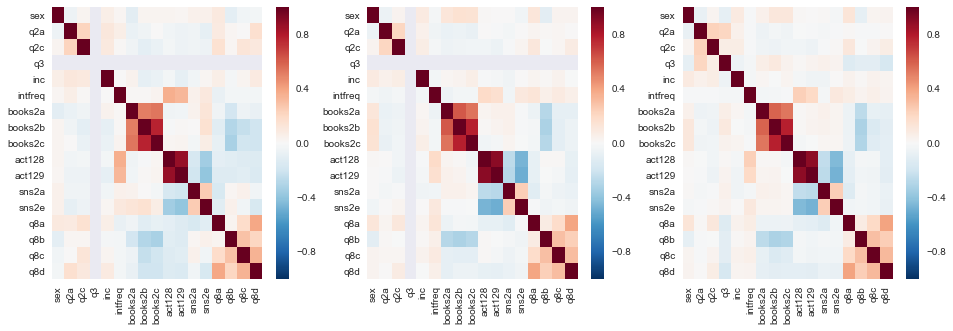

In [148]:
mu = infostress_gen[(infostress_gen.sns2e <= 3) | (infostress_gen.sns2e >= 1)]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))

ax1 = sns.heatmap(overload.corr(), ax = ax1)
ax2 = sns.heatmap(like_info.corr(), ax = ax2)
ax3 = sns.heatmap(mu.corr(), ax = ax3)

plt.show()

These heatmaps were an attempt to see the correlation between respondents who, like the graphs above, were either overwhelemed or pleased with the amount of information available, and the relationship this played with other groups of data in the survey.  All three look relatively similar in their distributions here.

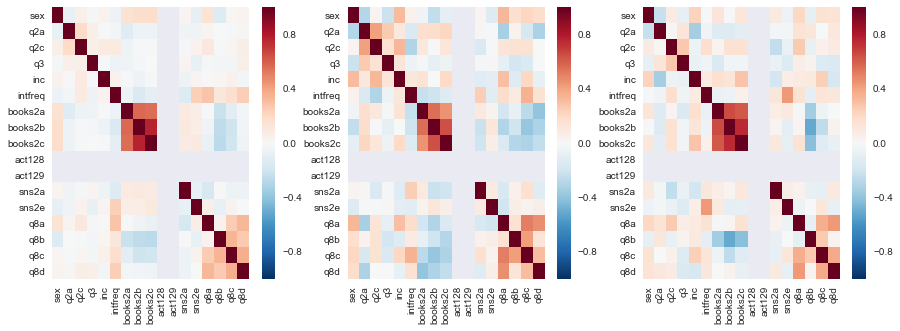

In [186]:
nu = better_data_x[(better_data_x.sns2e >= 1) & (better_data_x.sns2e <= 3)]
kappa = better_data_x[(better_data_x.sns2e >= 5) & (better_data_x.sns2e <= 6)]
bb8 = better_data_x[(better_data_x.sns2a >= 5) & (better_data_x.sns2a <= 6)]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1 = sns.heatmap(data = nu.corr(), ax = ax1)
ax2 = sns.heatmap(data = kappa.corr(), ax = ax2)
ax3 = sns.heatmap(data = bb8.corr(), ax = ax3)

These heatmaps are a little more specific, observing those who frequently use Facebook against those who do *not* 
use Facebook or Twitter (graph 3) on a daily basis.  In the second graph, we get some potential leads: namely, 
these respondents who do not use Facebook regularly, tend to show a tendency of reading more (in either format - books2a-books2c),
while simultaneously showing some overwhelmedness regarding information prevalence(q3, q2a, q2c), yet showing a relatively high 
amount of internet use(intfreq).

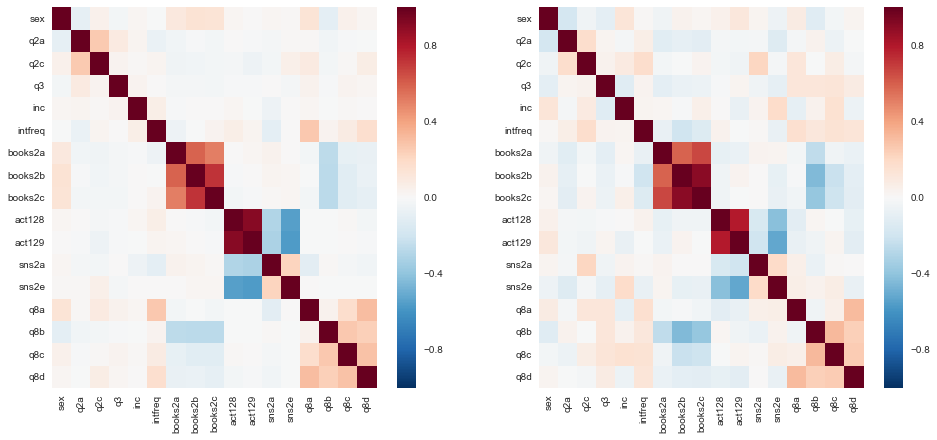

In [151]:
iota = better_data_x[(better_data_x.intfreq >= 1) & (better_data_x.intfreq <= 3)]
xi = better_data_x[(better_data_x.intfreq >= 4) & (better_data_x.intfreq <= 5)]

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))
ax1 = sns.heatmap(data = iota.corr(), ax = ax1)
ax2 = sns.heatmap(data = xi.corr(), ax = ax2)

These heatmaps look specifically at frequency of internet use alone.  Interestingly enough, both frequent and 
non-frequent users show relatively high levels of reading in either format. Other than that, things seem to be 
dispersed relatively evenly.

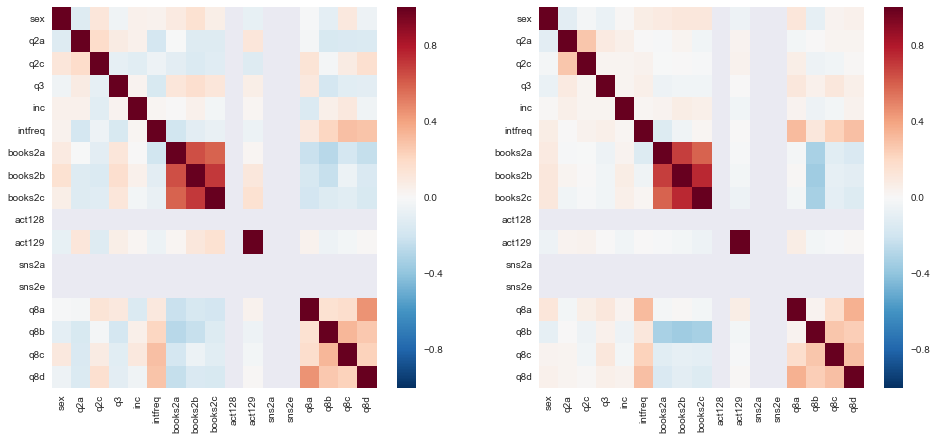

In [227]:
no_snapchat = better_data_x[(better_data_x.act128 == 2)]

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))
ax1 = sns.heatmap(data = snapchat.corr(), ax = ax1)
ax2 = sns.heatmap(data = no_snapchat.corr(), ax = ax2)

This is another interesting set of heatmaps.  The graph on the left shows how other columns relate to those who *use* Snapchat while the graph on the right shows those who do *not* use Snapchat.  As you can see, the relationship between Snapchat users and feelings of information overload is stronger than those who do not use Snapchat.  Those who do not use Snapchat show a lower tendency towards information overload.  Similarly, the Snapchat users show a higher likelihood of choosing print media for reading over digital - a stronger contrast, in fact, than those who do not use snapchat.

Thus, while the Pew Center's summaries noted the prevalence of respondents who still preferred physical books, to my knowledge, their report did not look at how this corresponded with the feelings of information overload or information 
preference in regards to this preference for physical books. While one might initially suspect that those who choose print books would demonstrate a tendency of overwhelmedness regarding information, the choice for physical books is equally prevalent among both parties.  As digital information grows on an exponential scale and people either show a trend of enjoying this change or dislking it, print media remains the favorite of both groups.